In [1]:
import os

In [2]:
os.listdir(path='/kaggle/input/female-voice')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = '/kaggle/input/female-voice'
listOfFiles = getListOfFiles(dirName)
# x=listOfFiles[0:800]
len(listOfFiles)
# len(x)

2311

In [3]:
os.listdir(path='/kaggle/input/male-voice')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles
dirName = '/kaggle/input/male-voice'
Files = getListOfFiles(dirName)
len(Files)

3682

In [4]:
!pip install noisereduce

In [6]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=06753902d1cb6ff66cb1a46a406b658f07c47c069405afbc6035ff38e3ddd79f
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python_speech_features


In [7]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc , logfbank
import librosa as lr
import librosa
from glob import glob
import os, glob, pickle
from scipy import signal
import noisereduce as nr
from glob import glob
# get_ipython().magic('matplotlib inline')
# #All the Required Packages and Libraies are installed.
import soundfile
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten, LSTM
from keras.layers import Dropout,Dense,TimeDistributed
from keras.models import Sequential
# from keras.utils import to_categorical 
# from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [8]:
import IPython.display as ipd
from itertools import cycle
import librosa.display
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [9]:
ipd.Audio(Files[0])

In [10]:
y, sr = librosa.load(Files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 0.03401347  0.03754241  0.02694097  0.02370723  0.02267744  0.01926675
  0.01655799  0.00585671 -0.01223491 -0.02307148]
shape y: (143943,)
sr: 22050


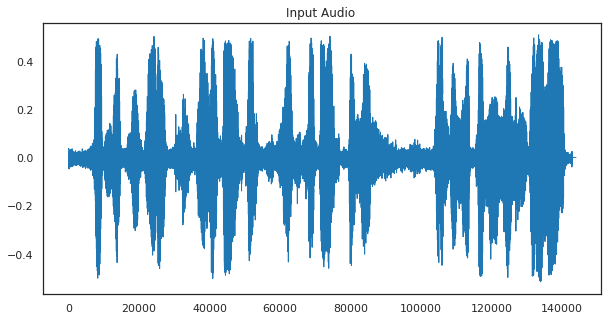

In [11]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Input Audio ',
                 color=color_pal[0])
plt.show()


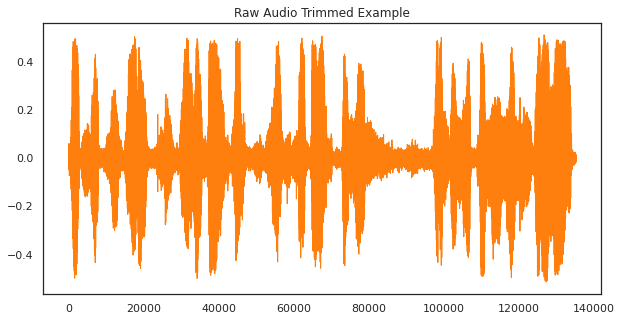

In [12]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

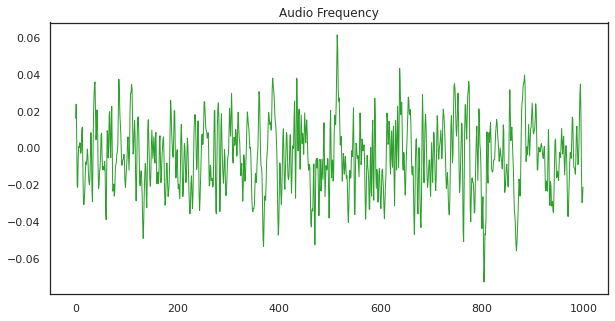

In [13]:
pd.Series(y[35000:36000]).plot(figsize=(10, 5),
                  lw=1,
                  title='Audio Frequency',
                 color=color_pal[2])
plt.show()

In [14]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 282)

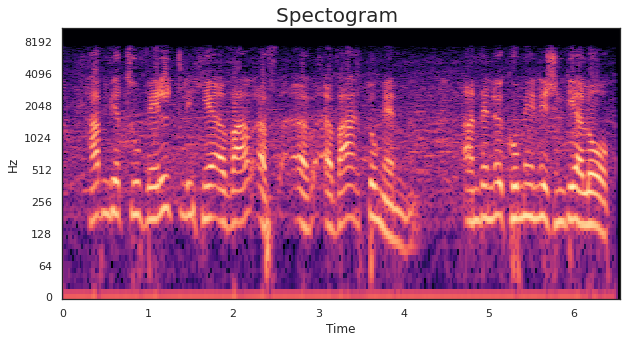

In [15]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram ', fontsize=20)
# fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

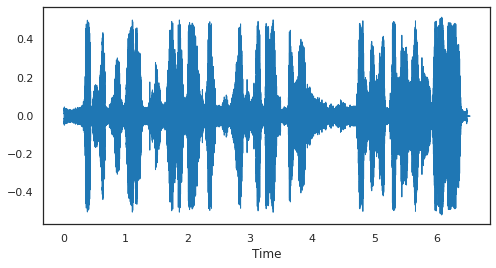

In [16]:
plt.figure(figsize=(8, 4))
librosa.display.waveshow(y, sr=sr)

In [17]:
S = librosa.feature.melspectrogram(y=y,
                                  sr=sr,  
                                  n_mels=50,)
S

array([[3.7113506e-02, 2.9669221e-02, 2.5075529e-02, ..., 2.3445634e-02,
        3.5144077e-03, 1.7777484e-10],
       [8.1747063e-03, 1.5324315e-02, 1.1078220e-02, ..., 9.9079460e-03,
        6.8446249e-04, 2.8467176e-10],
       [1.6418163e-02, 4.5522824e-02, 4.6511844e-02, ..., 1.1521313e-02,
        1.0261311e-03, 3.4147990e-10],
       ...,
       [1.6824149e-05, 4.1784942e-06, 1.0452859e-15, ..., 2.8785721e-16,
        3.6616751e-17, 7.7864486e-19],
       [1.5011657e-05, 3.7302225e-06, 7.0595008e-16, ..., 3.1191795e-16,
        3.6575237e-17, 3.5064865e-20],
       [1.4037534e-05, 3.4890420e-06, 7.8792868e-16, ..., 2.1708364e-16,
        2.8568022e-17, 1.1466320e-20]], dtype=float32)

In [18]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

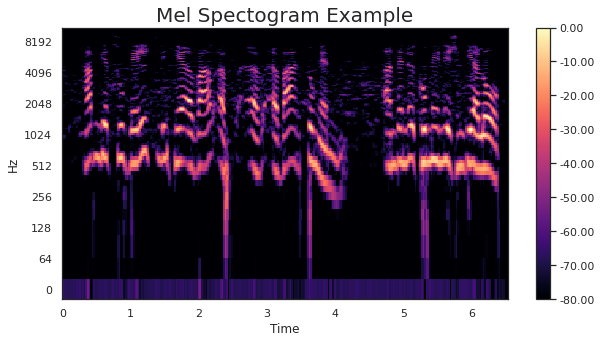

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [20]:
def extract_features(sound, sample_rate):
    
    mfccs = np.mean(librosa.feature.mfcc(y=sound, sr=sample_rate, n_mfcc=40).T, axis=0)
    stft = np.abs(librosa.stft(sound))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(sound, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(sound),sr=sample_rate).T, axis=0)
#     rate_speech, syllables, pauses, time_of_speaking, articulation_rate, freq_mean, freq_min, freq_max = all_features_in_audio(path, name, path_praat_file)
    
    
  
    return mfccs, chroma, contrast, tonnetz,mel,stft

In [21]:
extract_features(y,sr)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Pass y=[0.03401347 0.03754241 0.02694097 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


(array([-2.01595596e+02,  1.46166855e+02, -5.96322441e+01,  3.36241837e+01,
        -2.61268692e+01,  2.69442201e+00, -1.35452414e+01,  4.74225092e+00,
        -1.56995268e+01, -5.48736715e+00,  1.00022926e+01, -1.56347971e+01,
         2.65173125e+00, -1.20024052e+01, -8.77991080e-01, -4.19715071e+00,
        -5.28088617e+00, -2.49362087e+00, -3.37636948e+00, -2.20408392e+00,
        -5.26911497e+00,  1.79524910e+00, -6.11261225e+00, -1.75165749e+00,
        -2.83567071e+00, -1.34904945e+00, -4.96685648e+00, -4.56760597e+00,
        -9.20457661e-01, -5.07039309e+00, -1.12864174e-01, -2.56429243e+00,
         5.85253894e-01, -3.59860152e-01,  1.88160849e+00,  3.24152994e+00,
         4.33012486e+00,  6.45510483e+00,  6.28477383e+00,  8.37272739e+00],
       dtype=float32),
 array([0.46106786, 0.4759581 , 0.5109586 , 0.59510493, 0.69186527,
        0.7099847 , 0.6882097 , 0.61529773, 0.5531159 , 0.50951177,
        0.45029435, 0.43206164], dtype=float32),
 array([21.6789459 , 16.6938016

In [25]:
def feature_extractor(file):
    audio,sample_rate=librosa.load(file,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [26]:
feature_extractor(Files[5])

array([-273.19196  ,  164.15324  ,  -26.912619 ,   44.12468  ,
         -9.662285 ,    6.1391344,   -9.455239 ,   -4.3236265,
        -14.234394 ,   -6.5655966,   -1.2326592,  -16.13347  ,
          2.9008918,  -10.735512 ,    0.9374799,   -1.4418964,
         -5.6291394,   -3.522164 ,   -3.7096553,   -3.9045265,
        -11.319951 ,    2.294326 ,   -4.9616504,   -1.063805 ,
          5.1000447,   -3.8777273,   -7.42592  ,   -5.261809 ,
         -3.4405496,   -5.674061 ,    1.1042749,   -4.872329 ,
         -5.379126 ,   -3.570776 ,   -4.14053  ,    0.327473 ,
         -4.522454 ,   -4.943819 ,   -4.070762 ,   -2.7164063],
      dtype=float32)

In [27]:
extracted_features=[]

In [28]:
for i in listOfFiles:
#   file_name=os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
#   final_class_labels=row["class"]
    data=feature_extractor(i)
    extracted_features.append([data,"female"])

In [29]:
for i in Files:
#   file_name=os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
#   final_class_labels=row["class"]
    data=feature_extractor(i)
    extracted_features.append([data,"male"])

In [30]:
dataset=pd.DataFrame(extracted_features,columns=['feature','Gender'])
dataset

,feature,Gender
0,"[-256.90744, 149.04385, -28.22326, 50.440342, ...",female
1,"[-224.33441, 145.96062, -26.196352, 48.441, -3...",female
2,"[-448.49423, 104.653946, -49.903145, 42.873257...",female
3,"[-262.0176, 137.7896, -41.00675, 60.82039, -30...",female
4,"[-328.63812, 136.40608, -35.138668, 42.56035, ...",female
...,...,...
5988,"[-289.91568, 145.16248, -9.302762, 69.75313, -...",male
5989,"[-310.33472, 128.68007, -22.849922, 51.848476,...",male
5990,"[-302.5304, 137.56705, -34.060135, 9.684628, -...",male
5991,"[-257.30157, 111.30073, -24.296669, 65.33986, ...",male


In [31]:
x=np.array(dataset['feature'].tolist())
y=np.array(dataset['Gender'].tolist())

In [32]:
x.shape

(5993, 40)

In [33]:
y= pd.get_dummies(dataset['Gender'])

In [34]:
y

,female,male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
5988,0,1
5989,0,1
5990,0,1
5991,0,1


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [36]:
x_train.shape

(4494, 40)

In [37]:
x_train.ndim

2

In [38]:
x_test.shape

(1499, 40)

In [39]:
y_train.shape

(4494, 2)

In [40]:
y_test.shape

(1499, 2)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [42]:
num_labels=y.shape[1]

In [ ]:
model=Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
model.fit(x_train,y_train,batch_size=10,epochs=20,validation_data=(x_test,y_test))

# **USING CNN MODEL**

In [43]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten,BatchNormalization,GlobalAveragePooling1D,GlobalMaxPooling1D

In [44]:
# Normalize the MFCC features to have zero mean and unit variance
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [45]:
x_train = x_train.reshape(-1, 40, 1)
x_test = x_test.reshape(-1, 40, 1)

In [46]:
x_train.shape[0]

4494

In [47]:
 x_train.shape[1]

40

In [48]:
# Create the model
def cnn():
    model = Sequential()
    model.add(Conv1D(32, 3, activation='relu', input_shape=(40,1)))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    return model


In [49]:
model=cnn()

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 38, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 19, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 17, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [51]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
# Train the model
Model=model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
225/225 [==============================] - 3s 9ms/step - loss: 0.3478 - accuracy: 0.8563 - val_loss: 0.2924 - val_accuracy: 0.8839
Epoch 2/50
225/225 [==============================] - 2s 8ms/step - loss: 0.2506 - accuracy: 0.9065 - val_loss: 0.2866 - val_accuracy: 0.8873
Epoch 3/50
225/225 [==============================] - 2s 8ms/step - loss: 0.2287 - accuracy: 0.9117 - val_loss: 0.2790 - val_accuracy: 0.8906
Epoch 4/50
225/225 [==============================] - 2s 8ms/step - loss: 0.2189 - accuracy: 0.9157 - val_loss: 0.2899 - val_accuracy: 0.8913
Epoch 5/50
225/225 [==============================] - 2s 9ms/step - loss: 0.2034 - accuracy: 0.9232 - val_loss: 0.2826 - val_accuracy: 0.9019
Epoch 6/50
225/225 [==============================] - 2s 8ms/step - loss: 0.1945 - accuracy: 0.9268 - val_loss: 0.2955 - val_accuracy: 0.8939
Epoch 7/50
225/225 [==============================] - 2s 8ms/step - loss: 0.1811 - accuracy: 0.9310 - val_loss: 0.2796 - val_accuracy: 0.8953
Epoch 

In [53]:
model.save("cnn.h5")

In [54]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

47/47 [==============================] - 0s 4ms/step - loss: 0.9995 - accuracy: 0.8833
Test loss: 0.9994861483573914
Test accuracy: 0.8832554817199707


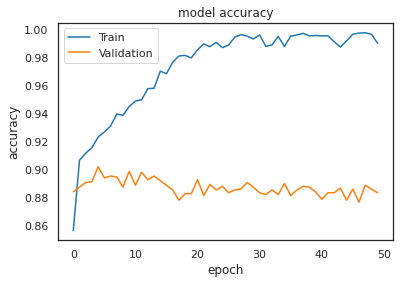

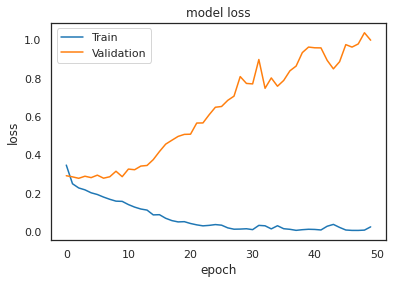

In [55]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(40, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=10, epochs=20, validation_data=(x_test, y_test))


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

In [ ]:
model = Sequential()
model.add(Conv1D(32, 5, activation='relu', input_shape=(40, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=20, epochs=30, validation_data=(x_test, y_test))


# **RESNET**

In [56]:
import numpy as np
import keras
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Add, Activation
from keras.models import Model

In [57]:
# Create the ResNet block
def resnet_block(inputs, filters, strides):
    x = Conv1D(filters, 3, strides=strides, padding='same')(inputs)
    x = Activation('relu')(x)
    x = Conv1D(filters, 3, padding='same')(x)
    shortcut = Conv1D(filters, 1, strides=strides)(inputs)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Input layer
inputs = Input(shape=(40, 1))

# First Conv1D layer
x = Conv1D(32, 3, padding='same')(inputs)

# ResNet blocks
for i in range(3):
    x = resnet_block(x, 32, 1)

# Pooling layer
x = MaxPooling1D(2)(x)

# Fully connected layer
x = Flatten()(x)
x = Dense(2, activation='softmax')(x)

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 38, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 19, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 17, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [68]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [69]:
model.fit(x_train, y_train, batch_size=10, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
450/450 [==============================] - 6s 12ms/step - loss: 0.3478 - accuracy: 0.8623 - val_loss: 0.3015 - val_accuracy: 0.8779
Epoch 2/50
450/450 [==============================] - 5s 11ms/step - loss: 0.2611 - accuracy: 0.8996 - val_loss: 0.2895 - val_accuracy: 0.8799
Epoch 3/50
450/450 [==============================] - 5s 11ms/step - loss: 0.2305 - accuracy: 0.9172 - val_loss: 0.3167 - val_accuracy: 0.8853
Epoch 4/50
450/450 [==============================] - 5s 11ms/step - loss: 0.2135 - accuracy: 0.9203 - val_loss: 0.3101 - val_accuracy: 0.8806
Epoch 5/50
450/450 [==============================] - 5s 11ms/step - loss: 0.1950 - accuracy: 0.9290 - val_loss: 0.2981 - val_accuracy: 0.8806
Epoch 6/50
450/450 [==============================] - 5s 11ms/step - loss: 0.1738 - accuracy: 0.9357 - val_loss: 0.3104 - val_accuracy: 0.8953
Epoch 7/50
450/450 [==============================] - 5s 11ms/step - loss: 0.1524 - accuracy: 0.9466 - val_loss: 0.3675 - val_accuracy: 0.8793

In [70]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

47/47 [==============================] - 0s 7ms/step - loss: 0.9862 - accuracy: 0.8819
Test loss: 0.9861840605735779
Test accuracy: 0.8819212913513184


In [71]:
model.save("RN.h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# **RESNET-50**

In [63]:
def resnet_block(inputs, filters, kernel_size, strides):
    x = Conv1D(filters, kernel_size, strides=strides, padding='same')(inputs)
    x = Activation('relu')(x)
    x = Conv1D(filters, kernel_size, strides=strides, padding='same')(x)
    x = Add()([inputs, x])
    return x

# Define the input layer
inputs = Input(shape=(40, 1))

# Define the first convolutional layer
x = Conv1D(64, 7, strides=2, padding='same')(inputs)
x = Activation('relu')(x)
x = MaxPooling1D(3, strides=2, padding='same')(x)

# Define the residual blocks
for i in range(3):
    x = resnet_block(x, 64, 3, 1)

# Define the fully connected layer for classification
x = Flatten()(x)
x = Dense(2, activation='softmax')(x)

In [64]:
model = Model(inputs=inputs, outputs=x)

In [65]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 40, 1)]      0                                            
__________________________________________________________________________________________________
conv1d_19 (Conv1D)              (None, 20, 64)       512         input_3[0][0]                    
__________________________________________________________________________________________________
activation_10 (Activation)      (None, 20, 64)       0           conv1d_19[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_4 (MaxPooling1D)  (None, 10, 64)       0           activation_10[0][0]              
______________________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))
